<a href="https://colab.research.google.com/github/GoPlusUltra/Bike-Sharing-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import datetime as dt

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin-1')

Getting the gist of the data.

In [146]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [147]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


From Seeing this data, what questions can we ask??
1. How holidays are impacting to rent bike?
2. We have the 01/12/2017 to 30/11/2018 data on hourly basis. So how the daytime and night time impacting on our output?
We need to sum all hourly data and plot a graph.
3. What is season wise output??
4. How snowfall affecting our customers?
5. How Rainfall affecting our customers?
6. If there is less visibility then our count should go ideally down. We need to find what our data is showing us.
7. what our count on Functoning day and vice versa.
8. how temperature is affecting on our bike renting count?
9. We need HeatMap for finding the co relation between our variables. So that we can drop highly corelated variables at the time of applying machine regression algorithm.

We find each answer and will try to find trend.

So Lets Hop On..

In [148]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


1. How holidays are impacting to rent bike? **Done**
2. We have the 01/12/2017 to 30/11/2018 data on hourly basis. So how the daytime and night time impacting on our output? **Done**
We need to sum all hourly data and plot a graph.
3. What is season wise output?? **Done**
4. How snowfall affecting our customers? **Done**
5. How Rainfall affecting our customers? **Done**
6. If there is less visibility then our count should go ideally down. We need to find what our data is showing us.
7. what our count on Functoning day and vice versa.
8. how temperature is affecting on our bike renting count? **Done**
9. We need HeatMap for finding the co relation between our variables. So that we can drop highly corelated variables at the time of applying machine regression algorithm.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We are cool as we dont have any null values. We are ready to go on quest then..

First we will do Exploratory Data Analysis.

# Finding how the holidays are impacting on bike sharing count.

In [150]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [151]:
sns.set_style('darkgrid')

Text(0.5, 12.199999999999974, 'Day Type')

<Figure size 1080x576 with 0 Axes>

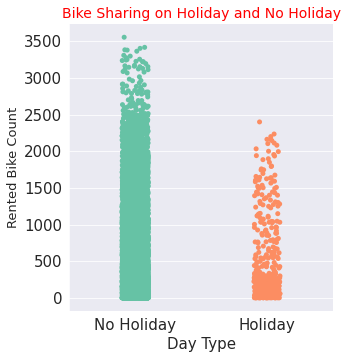

In [152]:
plt.figure(figsize=(15,8))
sns.catplot(x='Holiday',y='Rented Bike Count',data=df,palette='Set2')
plt.title('Bike Sharing on Holiday and No Holiday',color='r',fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=13)
plt.xlabel('Day Type',fontsize=15)


In [153]:
mean_count_on_daytype=df.groupby(['Holiday'])['Rented Bike Count'].mean()
print('mean demand of Bike Sharing on holiday is:',mean_count_on_daytype['Holiday'])
print('mean demand of Bike Sharing on no holiday is:',mean_count_on_daytype['No Holiday'])



mean demand of Bike Sharing on holiday is: 499.75694444444446
mean demand of Bike Sharing on no holiday is: 715.2280259365995


The bike sharing demand on Holiday is not as much as on No Holiday.  Thus we can see people dont share the bikes on holidays more often.

Also, The maximum count for No Holiday goes upto 3500. In case of Holiday which is around 2000.

The  demand of Bike on Holiday limits less than 500 as the area covered by dots on the plot is less.

Try to find individual total count using for loop.
Below code isnt working.


# Lets find how much share of total rides are taken on No Holiday..

In [154]:
total_count_on_daytype=df.groupby(['Holiday'])['Rented Bike Count'].sum()
print('Total rides on Holidays are ',total_count_on_daytype['Holiday'])  
print('Total rides on No Holidays are ',total_count_on_daytype['No Holiday'])

Total rides on Holidays are  215895
Total rides on No Holidays are  5956419


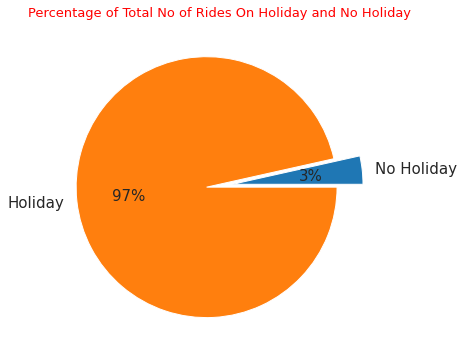

In [155]:
plt.figure(figsize=(6,6))
explode=(.1,.1)
labels="No Holiday","Holiday"
plt.pie(total_count_on_daytype, autopct='%.0f%%',explode=explode,labels=labels)
plt.title('Percentage of Total No of Rides On Holiday and No Holiday',color='r', fontsize=13)
plt.rcParams.update({'font.size': 15})

We can see the 97% of the rides from  01/12/2017 to 30/11/2018 are taken on No Holiday.

In [156]:
df['Functioning Day'].value_counts() #junk

Yes    8465
No      295
Name: Functioning Day, dtype: int64

# How the demand of the bikes shows variation on different hours of the day time?

In [157]:
hourly_analysis = df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
hourly_analysis.head()

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


Text(0.5, 1.0, 'Rented Bike Analysis by Hour')

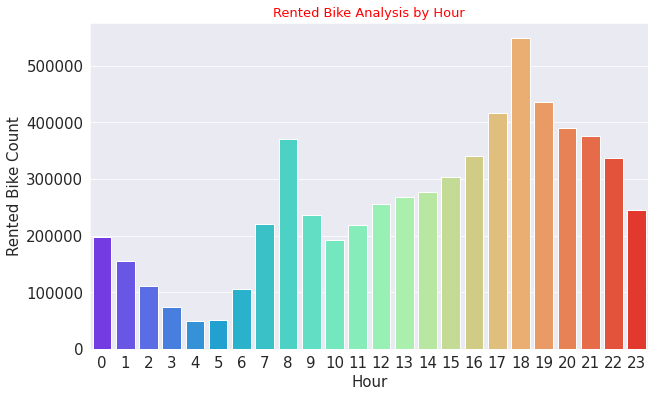

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=hourly_analysis,palette='rainbow')
plt.title('Rented Bike Analysis by Hour',color='r', fontsize=13)


As we can see demand for vehicles decreases at night drastically and increases gradually from 6 Hour.

# Bike Rental insights from each season

In [159]:
season_wise_analysis=df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
season_wise_analysis

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


Text(0.5, 1.0, 'Seasonwise Bike Rental Counts')

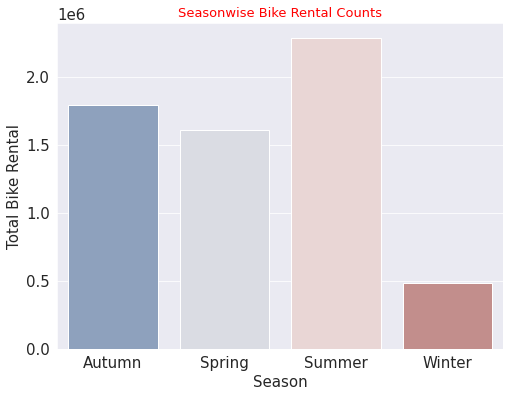

In [160]:
plt.figure(figsize=(8,6))
plot=sns.barplot(x='Seasons',y='Rented Bike Count',data=season_wise_analysis,palette='vlag')
plt.xlabel('Season')
plt.ylabel('Total Bike Rental')
plt.title('Seasonwise Bike Rental Counts',color='r', fontsize=13)

We can see that demand in winter is too less than other Seasons. Cause obvious resaon is people prefer Cars to avoid cold.

In [161]:
snowfall_analysis=df.groupby(['Snowfall (cm)'])['Rented Bike Count'].sum().reset_index()
snowfall_analysis.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


As we are expecting, **Bike Rental is maximum for '0'cm Snowfall**. But Its a huge Outlier for our analysis. So excluding that data we will analysis the remaining data.

Text(0.5, 1.0, 'Effect of Snowfall on bike rental')

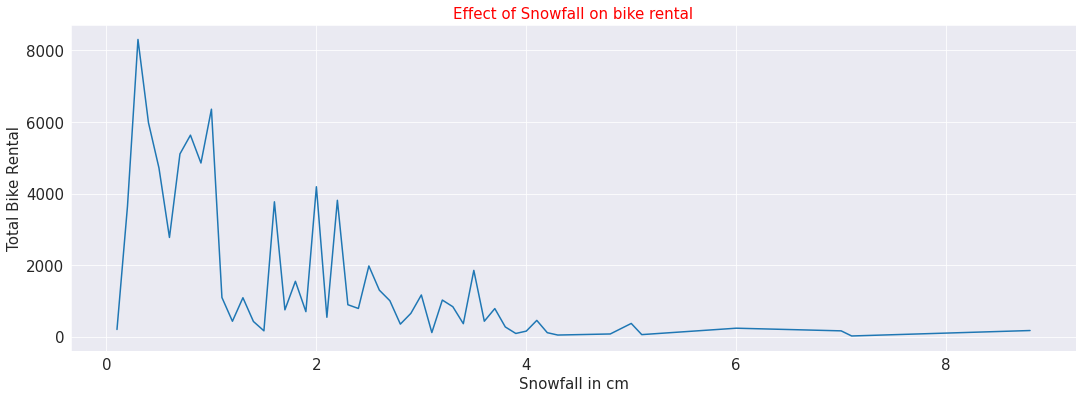

In [162]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=snowfall_analysis[1:] )
plt.xlabel('Snowfall in cm')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Snowfall on bike rental',color='r', fontsize=15)

In [163]:
rainfall_analysis=df.groupby(['Rainfall(mm)'])['Rented Bike Count'].sum().reset_index()
rainfall_analysis.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


We are excluding the data at no Rainfall cause similar reason as no Snowfall day.

Text(0.5, 1.0, 'Effect of Rainfall on bike rental')

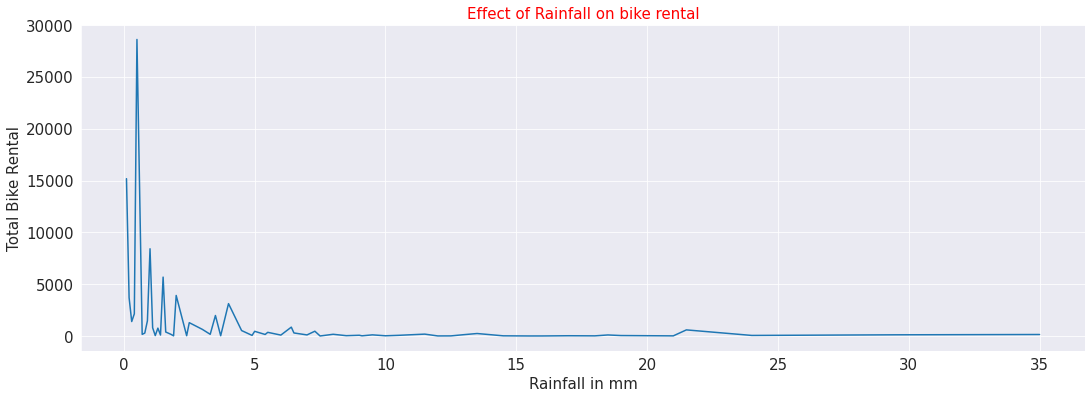

In [164]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=rainfall_analysis[1:] )
plt.xlabel('Rainfall in mm')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Rainfall on bike rental',color='r', fontsize=15)

At No Rainfall and No Snowfall day demand is as expected is Maximum.

There is slight demand for bikes when Snowfall is less than 4cm and almost no demand after that.

In case of Rainfall, we can see when there is more rain than 5mm there is almost no demand for Bikes.

# Effect of Temprature on Bike Rental.

In [165]:
Temperature_analysis=df.groupby(['Temperature(°C)'])['Rented Bike Count'].sum().reset_index()
Temperature_analysis.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


Text(0.5, 1.0, 'Effect of Temperature on bike rental')

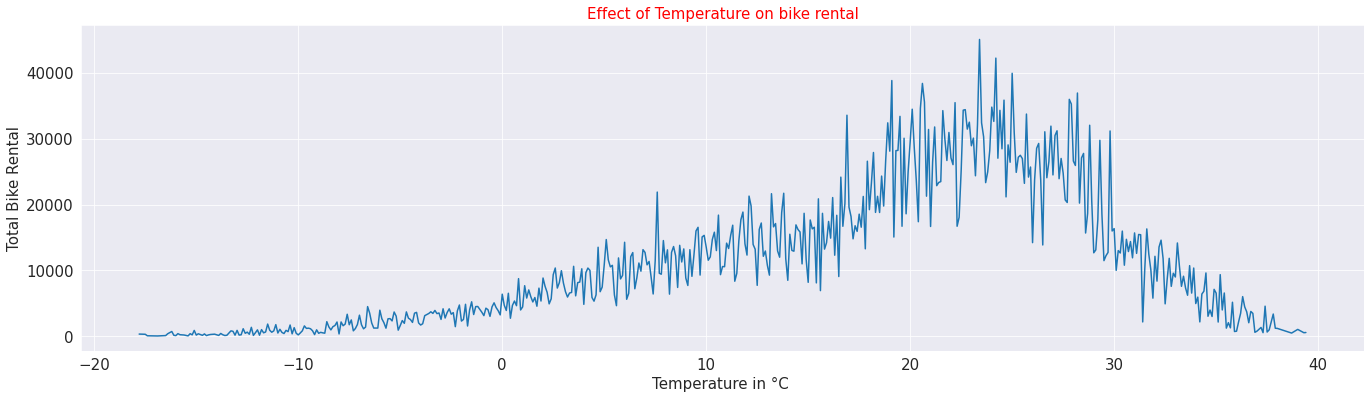

In [166]:
plt.figure(figsize=(23,6))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=Temperature_analysis )
plt.xlabel('Temperature in °C ')
plt.ylabel('Total Bike Rental')
plt.title('Effect of Temperature on bike rental',color='r', fontsize=15)

We can see the Bike rental sum is somewhat normally distributed around Temperature 23°C, if we neglect outliers.

In [167]:
df['Date'] = df['Date'].apply(lambda x:  dt.datetime.strptime(x,"%d/%m/%Y")) 

In [168]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year


In [169]:
df['month_and_year']=df['Date'].dt.strftime('%m-%Y')

# Finding the Monthwise Trend in Bike Rentals.

In [170]:
df['month_and_year']

0       12-2017
1       12-2017
2       12-2017
3       12-2017
4       12-2017
         ...   
8755    11-2018
8756    11-2018
8757    11-2018
8758    11-2018
8759    11-2018
Name: month_and_year, Length: 8760, dtype: object

In [171]:
monthwise_bike_count_analysis=df.groupby(['month_and_year'])['Rented Bike Count'].sum().reset_index()
monthwise_bike_count_analysis.head(20)

,month_and_year,Rented Bike Count
0,01-2018,150006
1,02-2018,151833
2,03-2018,380594
3,04-2018,524227
4,05-2018,707088
5,06-2018,896887
6,07-2018,734460
7,08-2018,651887
8,09-2018,673612
9,10-2018,650675


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

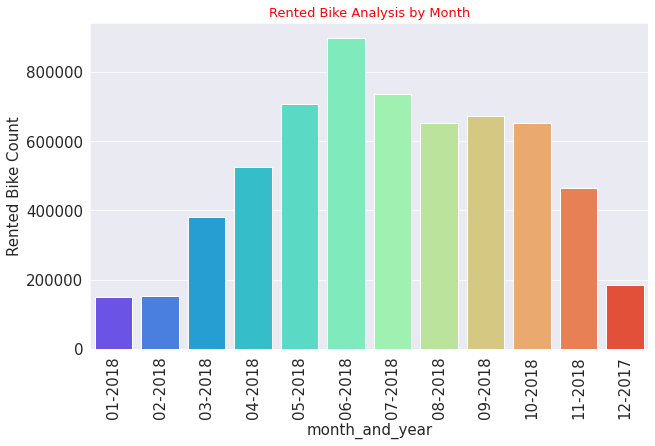

In [172]:
plt.figure(figsize=(10,6))
sns.barplot(x='month_and_year',y='Rented Bike Count',data=monthwise_bike_count_analysis,palette='rainbow')
plt.title('Rented Bike Analysis by Month',color='r', fontsize=13)
plt.xticks(rotation=90)

The damand of bikes from April to November is maximum.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [174]:
# changing the data types of few columns
columns=['Hour','Day','Month','Year','month_and_year']
for i in columns:
  df[i]=df[i].astype('category')

In [175]:
num_columns=list(df.select_dtypes(['int64','float64']))
num_features=pd.Index(num_columns)
num_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [176]:
import scipy.stats as stat
import pylab

In [177]:
def qqplot(df,features):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.title(features)
  sns.distplot(df[features])
  plt.subplot(1,2,2)
  plt.title(features)
  stat.probplot(df[features],dist='norm',plot=pylab)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


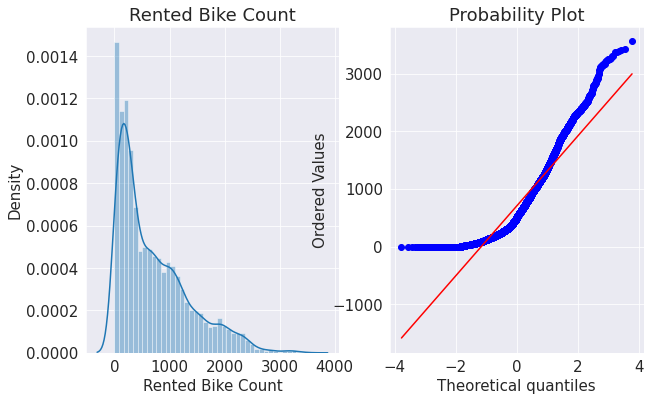

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


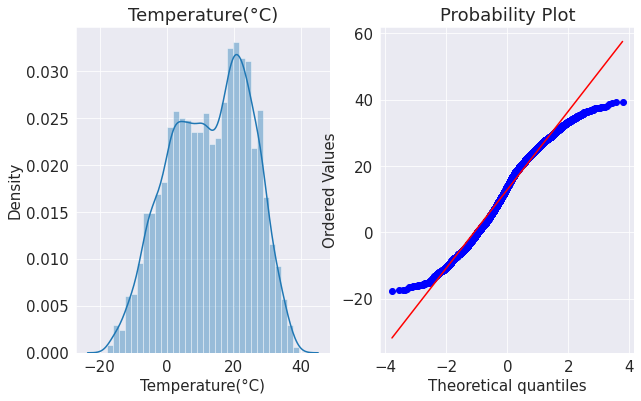

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


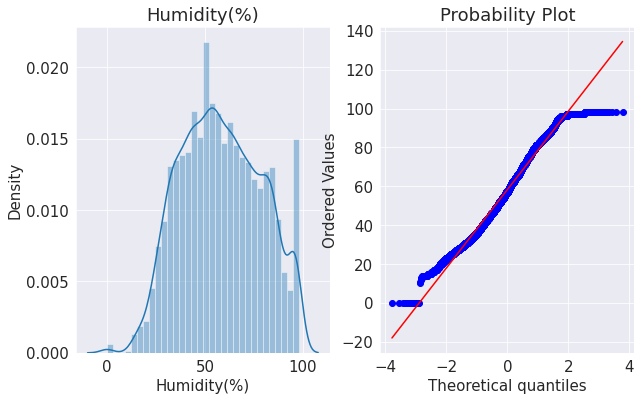

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


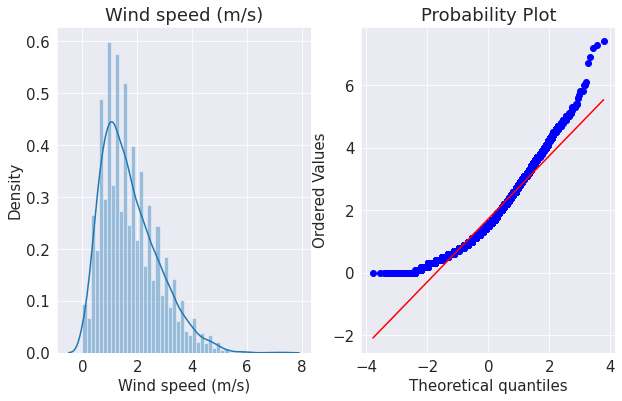

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


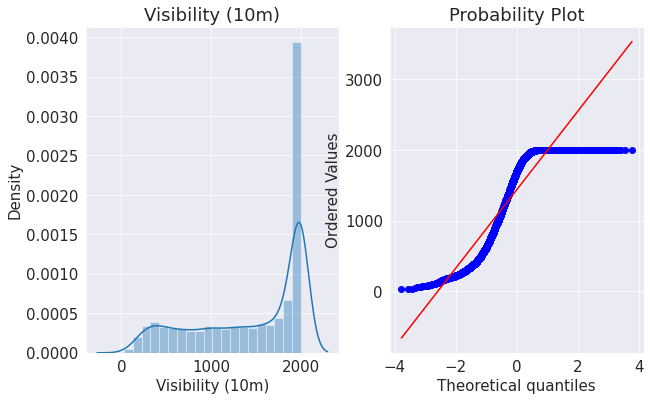

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


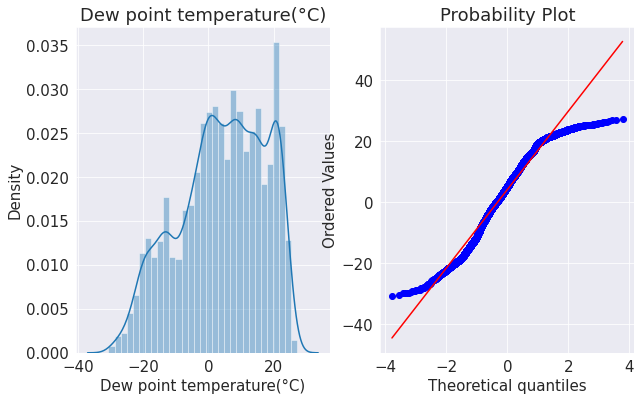

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


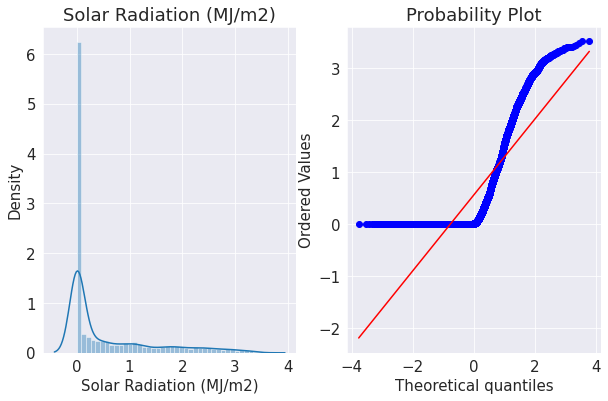

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


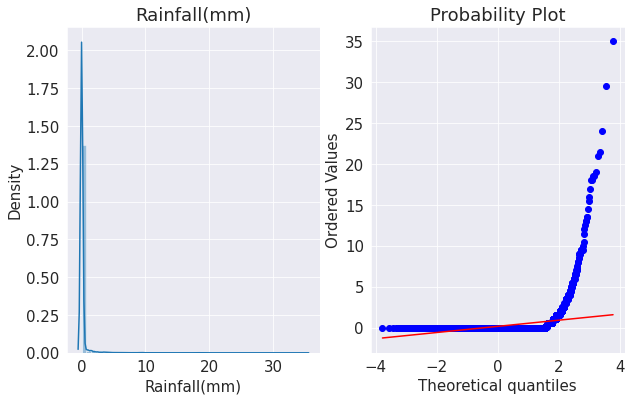

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


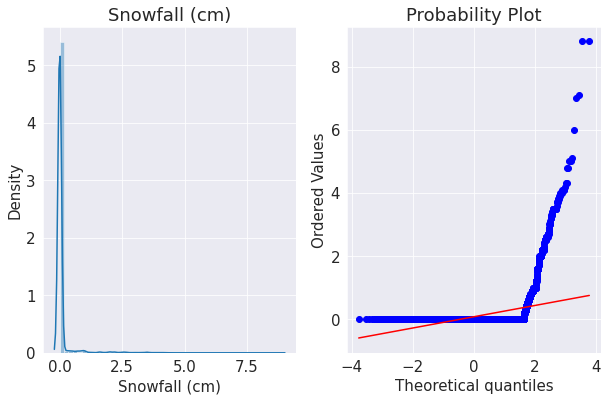

In [178]:
for i in list(df.describe().columns):
  qqplot(df,i)

windspeed, Visibility, snowfall, solar radiation need to be normalised.

In [179]:
#for i in num_features:
  #plt.figure(figsize=(8,6))
  #sns.distplot(x=df[i])
  #plt.xlabel(i)
#plt.show()

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()       #creating empty dataframe
    vif["variables"] = X.columns  #getting new columns and all coumn names from dataframe
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      #calculating vif variance_inflation_factor requires ndarray and index as an input

    return(vif)

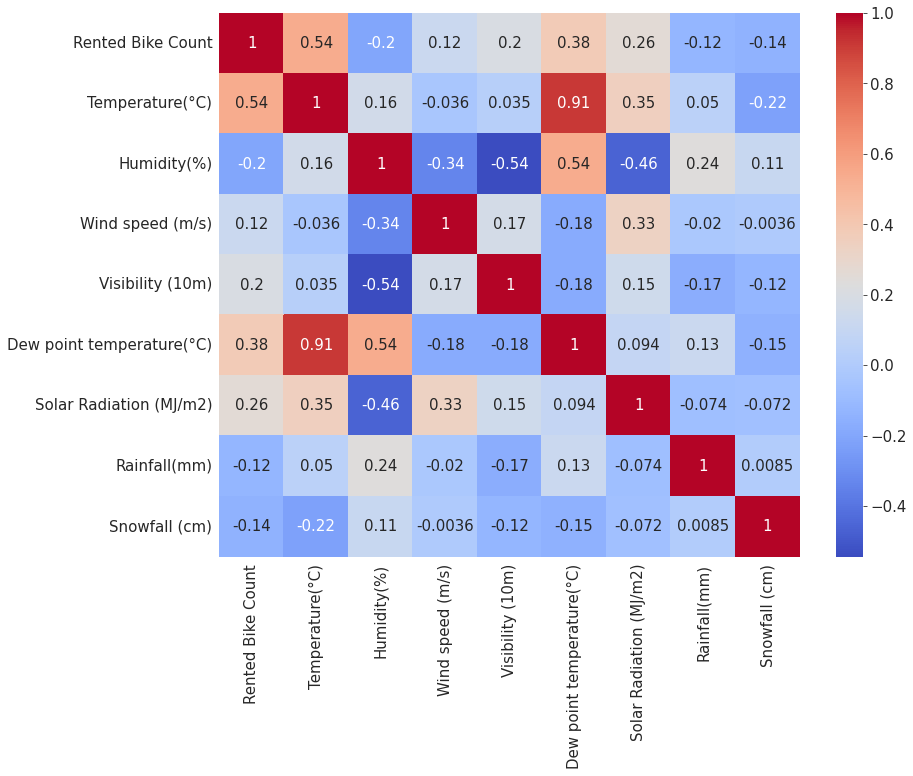

In [181]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [182]:
# Dew point Temparature is highly co-realted to Temperature, hence dropping it and extra column that we created month_and_year.
df=df.drop(columns=['Dew point temperature(°C)','month_and_year','Date','Day','Year'],axis=1)

In [183]:
calc_vif(df[[i for i in (df.describe().columns)]])                  #We only calculate VIF for Numerical features hence .describe()

,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


**As VIF is less than 5 for every feature we dont have any multi colinear features.**

# Preparing data

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  Month                    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 7

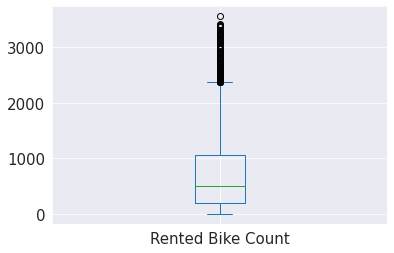

In [185]:
df['Rented Bike Count'].plot(kind='box')

As we can see there are many outliers in our output column. We need to replace with either mean or median or fancy imputer like knn.

In [186]:
# We will create a function to give Upper and Lower limit using IQR
def outlier_limits(col):
  '''
  This Function will provide Upper and lower Limit values of any Numeric Column using IQR
  '''
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [187]:
Upper_limit,Lower_limit=outlier_limits(df['Rented Bike Count'])

In [188]:
df[(df['Rented Bike Count'] < Lower_limit)|(df['Rented Bike Count'] > Upper_limit)]['Rented Bike Count'].count()

158

There are 158 Outliers in our target variable. We will first replace them with NAN and then will impute thiose values with KNN. 

In [189]:
df['Rented Bike Count']=np.where((df['Rented Bike Count'] < Lower_limit)|(df['Rented Bike Count'] > Upper_limit),np.nan,df['Rented Bike Count'])

In [190]:
df['Rented Bike Count'].isnull().sum()

158

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8602 non-null   float64 
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  Month                    8760 non-null   category
dtypes: category(2), float64(6), int64(2), object(3)
memory usage: 7

In [192]:
df=pd.get_dummies(df,columns=['Hour','Seasons','Holiday','Month','Functioning Day'],drop_first=True)

In [193]:
!pip install fancyimpute
from fancyimpute import KNN, IterativeImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:
knn= KNN()

In [195]:
df.iloc[:,:]=knn.fit_transform(df)

Imputing row 1/8760 with 0 missing, elapsed time: 38.455
Imputing row 101/8760 with 0 missing, elapsed time: 38.457
Imputing row 201/8760 with 0 missing, elapsed time: 38.458
Imputing row 301/8760 with 0 missing, elapsed time: 38.460
Imputing row 401/8760 with 0 missing, elapsed time: 38.461
Imputing row 501/8760 with 0 missing, elapsed time: 38.462
Imputing row 601/8760 with 0 missing, elapsed time: 38.463
Imputing row 701/8760 with 0 missing, elapsed time: 38.464
Imputing row 801/8760 with 0 missing, elapsed time: 38.466
Imputing row 901/8760 with 0 missing, elapsed time: 38.467
Imputing row 1001/8760 with 0 missing, elapsed time: 38.468
Imputing row 1101/8760 with 0 missing, elapsed time: 38.468
Imputing row 1201/8760 with 0 missing, elapsed time: 38.469
Imputing row 1301/8760 with 0 missing, elapsed time: 38.469
Imputing row 1401/8760 with 0 missing, elapsed time: 38.470
Imputing row 1501/8760 with 0 missing, elapsed time: 38.470
Imputing row 1601/8760 with 0 missing, elapsed time:

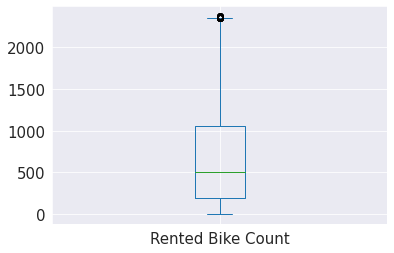

In [196]:
df['Rented Bike Count'].plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


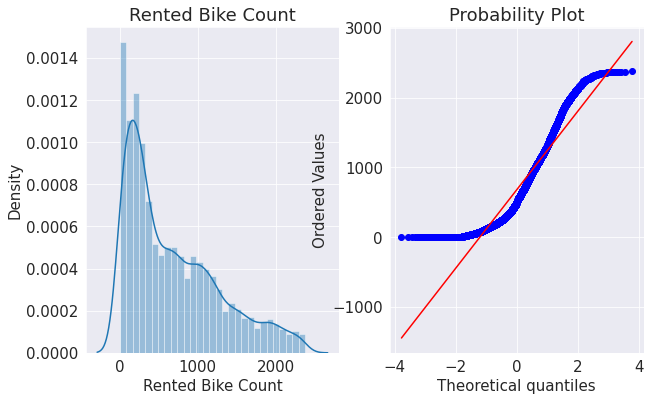

In [197]:
qqplot(df,'Rented Bike Count')

In [198]:
temp_df=df.copy()  #temp df

In [199]:
temp_df['Rented Bike Count']=np.sqrt(temp_df['Rented Bike Count'])

In [200]:
temp_df['Rented Bike Count']

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


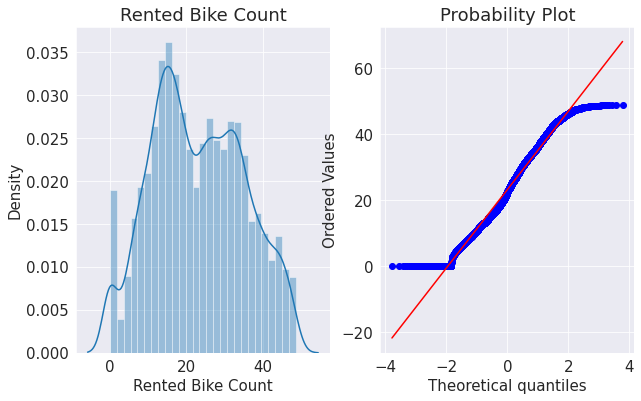

In [201]:
qqplot(temp_df,'Rented Bike Count')

As  Visibility, Rainfall, Snowfall and Solar Radiation features data is not getting normalised, we are converting that data into categorical feature,

In [202]:
df['Visibility']=df['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
df['Rainfall']=df['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
df['Snowfall']=df['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
df['Solar_Radiation']=df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)
#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
df.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)'],axis=1,inplace=True)

In [203]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Functioning Day_Yes',
       'Visibility', 'Rainfall', 'Snowfall', 'Solar_Radiation'],
      dtype='object')

In [204]:
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,...,Month_8,Month_9,Month_10,Month_11,Month_12,Functioning Day_Yes,Visibility,Rainfall,Snowfall,Solar_Radiation
0,254.0,-5.2,37.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
1,204.0,-5.5,38.0,0.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
2,173.0,-6.0,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
3,107.0,-6.2,40.0,0.9,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0
4,78.0,-6.0,36.0,2.3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0


In [205]:
features=df.drop(['Rented Bike Count'],axis=1)

Just scaling and just taking log transform is also not working.
First scaling and then taking log transform is not normalising the features.

In [206]:
X = features
y= np.sqrt(df[['Rented Bike Count']])

In [207]:
y.head()

,Rented Bike Count
0,15.937377
1,14.282857
2,13.152946
3,10.344080
4,8.831761


Using train_test_split for splitting the data into test and train sets. 

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6570, 46)
(2190, 46)


Using MinMaxScaler for standerdizing the data.

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [210]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [211]:
X_test

array([[0.49647887, 0.74489796, 0.17567568, ..., 0.        , 0.        ,
        0.        ],
       [0.69014085, 0.79591837, 0.13513514, ..., 0.        , 0.        ,
        0.        ],
       [0.37147887, 0.66326531, 0.58108108, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.87676056, 0.35714286, 0.24324324, ..., 0.        , 0.        ,
        1.        ],
       [0.5528169 , 0.51020408, 0.55405405, ..., 0.        , 0.        ,
        1.        ],
       [0.80633803, 0.43877551, 0.21621622, ..., 0.        , 0.        ,
        1.        ]])

# Implementing our first model Linear Regression

In [212]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression().fit(X_train, y_train)

In [213]:
regression.score(X_train,y_train)

0.7946746570638088

In [214]:
X_test

array([[0.49647887, 0.74489796, 0.17567568, ..., 0.        , 0.        ,
        0.        ],
       [0.69014085, 0.79591837, 0.13513514, ..., 0.        , 0.        ,
        0.        ],
       [0.37147887, 0.66326531, 0.58108108, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.87676056, 0.35714286, 0.24324324, ..., 0.        , 0.        ,
        1.        ],
       [0.5528169 , 0.51020408, 0.55405405, ..., 0.        , 0.        ,
        1.        ],
       [0.80633803, 0.43877551, 0.21621622, ..., 0.        , 0.        ,
        1.        ]])

In [215]:
regression.coef_

array([[ 2.31076924e+01, -9.18840701e+00, -6.02067626e-01,
        -2.52702897e+00, -5.36643545e+00, -7.14155829e+00,
        -1.02056967e+01, -9.62194209e+00, -4.41188766e+00,
         1.54806542e+00,  6.89177691e+00,  1.13083093e+00,
        -3.41524591e+00, -3.16866103e+00, -1.82689457e+00,
        -2.16185974e+00, -2.00259974e+00, -8.83852491e-01,
         7.76640399e-01,  4.28441232e+00,  6.78766241e+00,
         6.32762940e+00,  5.50732812e+00,  6.11773348e+00,
         4.96995455e+00,  1.25533215e+00,  1.15922218e+13,
         1.44918663e+13,  1.04175154e+13,  2.97069205e+00,
        -3.69216287e-01, -1.17470637e+12, -1.17470637e+12,
        -1.17470637e+12, -4.07435084e+12, -4.07435084e+12,
        -4.07435084e+12,  1.04175154e+13,  1.04175154e+13,
         1.04175154e+13,  1.99940297e+00,  2.81692575e+01,
         8.87716218e-02, -1.34358846e+01,  2.16353010e-01,
         1.85922070e+00]])

In [216]:
y_pred_train=regression.predict(X_train)


In [217]:
y_pred_test=regression.predict(X_test)

LR train set Evaluation Metrics

In [218]:
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score

In [219]:
LR_MSE=mean_squared_error((y_train),(y_pred_train))
print('MSE of Linear Regression Model is',LR_MSE)
LR_r2= r2_score(y_train, y_pred_train)
print('R2 score is',LR_r2)
LR_Adjusted_R2=(1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',LR_Adjusted_R2)

MSE of Linear Regression Model is 29.35886138036715
R2 score is 0.7946746570638088
Adjusted_Lasso_r2_score is 0.793226708914941


In [220]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Linear regression ',
       'MSE':round((LR_MSE),3),
       'R2_score':round((LR_r2),3),
       'Adjusted R2':round((LR_Adjusted_R2 ),3)
       }
train_df=pd.DataFrame(train_model_metrics_dict,index=[1])

LR test set Evaluation Metrics

In [221]:
LR_MSE=mean_squared_error((y_test),(y_pred_test))
print('MSE of Linear Regression Model is',LR_MSE)
LR_r2= r2_score(y_test, y_pred_test)
print('R2 score is',LR_r2)
LR_Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',LR_Adjusted_R2)

MSE of Linear Regression Model is 29.77033164615204
R2 score is 0.7959887000394643
Adjusted_Lasso_r2_score is 0.7916095494103534


In [222]:
# storing the test set metrics value in a dataframe for later comparison
Test_model_metrics_dict={'Model':'Linear regression ',
       'MSE':round((LR_MSE),3),
       'R2_score':round((LR_r2),3),
       'Adjusted R2':round((LR_Adjusted_R2 ),3)
       }
test_df=pd.DataFrame(Test_model_metrics_dict,index=[1])

# Implementing Lasso regression


In [223]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.1,max_iter=1000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [224]:
lasso.score(X_train,y_train)

0.7499897749607034

In [225]:
lasso.coef_

array([ 17.48061849,  -7.91450933,   0.        ,  -0.6913746 ,
        -3.66662523,  -5.48774473,  -8.37142303,  -7.77186068,
        -2.78913999,   0.        ,   4.19781661,   0.        ,
        -0.29523865,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,   0.        ,   0.        ,   2.73238817,
         4.5207009 ,   4.01537186,   2.66512712,   3.49483942,
         2.23309671,   0.        ,  -0.        ,  -0.        ,
        -7.58208948,   0.49007305,  -0.        ,  -2.55418737,
        -0.        ,   0.48632455,   2.01156545,  -0.        ,
        -0.86415387,   0.        ,   1.28103578,   0.        ,
         0.        ,  23.85067835,   0.18029431, -12.1608212 ,
        -0.        ,   0.71153302])

In [226]:
lasso_y_pred_train=lasso.predict(X_train)
lasso_y_pred_test=lasso.predict(X_test)


Lasso Train Set Evaluation Matrix.

In [227]:
Lasso_MSE=mean_squared_error(y_train,lasso_y_pred_train)
print('Lasso MSE is',Lasso_MSE)
Lasso_r2_score=r2_score(y_train,lasso_y_pred_train)
print('Lasso_r2_score is',Lasso_r2_score)
Lasso_Adjusted_R2=(1-(1-r2_score((y_train), (lasso_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',Lasso_Adjusted_R2)

Lasso MSE is 35.74822004745976
Lasso_r2_score is 0.7499897749607034
Adjusted_Lasso_r2_score is 0.7482267103659146


In [228]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Lasso regression ',
       'MSE':round((Lasso_MSE),3),
       'R2_score':round((Lasso_r2_score),3),
       'Adjusted R2':round((Lasso_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

In [229]:
train_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.359,0.795,0.793
1,Lasso regression,35.748,0.750,0.748


Lasso Test Set Evaluation Matrix.

In [230]:
Lasso_MSE=mean_squared_error(y_test,lasso_y_pred_test)
print(Lasso_MSE)
Lasso_r2_score=r2_score(y_test,lasso_y_pred_test)
print('Lasso_r2_score is',Lasso_r2_score)
Lasso_Adjusted_R2=(1-(1-r2_score((y_test), (lasso_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted_Lasso_r2_score is',Lasso_Adjusted_R2)

35.56877535071901
Lasso_r2_score is 0.7562528968923202
Adjusted_Lasso_r2_score is 0.7510208078848759


In [231]:
# storing the train set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Lasso regression ',
       'MSE':round((Lasso_MSE),3),
       'R2_score':round((Lasso_r2_score),3),
       'Adjusted R2':round((Lasso_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

In [232]:
test_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.770,0.796,0.792
1,Lasso regression,35.569,0.756,0.751


# Implementing Ridge Regression

In [233]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.1,max_iter=1000)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=1000)

In [234]:
ridge.score(X_train,y_train)

0.794672601072624

In [235]:
ridge_y_pred_train=ridge.predict(X_train)
ridge_y_pred_test=ridge.predict(X_test)

Ridge Train set Evaluation Metrics

In [236]:
ridge_MSE=mean_squared_error(y_train,ridge_y_pred_train)
print('ridge_MSE is ',ridge_MSE)

ridge_r2_score=r2_score(y_train,ridge_y_pred_train)
print('ridge_r2_score is',ridge_r2_score)

ridge_Adjusted_R2=(1-(1-r2_score((y_train), (ridge_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Ridge_Adjusted_R2 is',ridge_Adjusted_R2)

ridge_MSE is  29.359155360444465
ridge_r2_score is 0.794672601072624
Ridge_Adjusted_R2 is 0.7932246384249682


In [237]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Ridge regression ',
       'MSE':round((ridge_MSE),3),
       'R2_score':round((ridge_r2_score),3),
       'Adjusted R2':round((ridge_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Ridge Test Set Evaluation Matrix

In [238]:
ridge_MSE=mean_squared_error(y_test,ridge_y_pred_test)
print('ridge_MSE is ',ridge_MSE)

ridge_r2_score=r2_score(y_test,ridge_y_pred_test)
print('ridge_r2_score is',ridge_r2_score)

Ridge_Adjusted_R2=(1-(1-r2_score((y_test), (ridge_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Ridge_Adjusted_R2 is',Ridge_Adjusted_R2)

ridge_MSE is  29.768205478952144
ridge_r2_score is 0.7960032703217017
Ridge_Adjusted_R2 is 0.7916244324471325


In [239]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Ridge regression ',
       'MSE':round((ridge_MSE),3),
       'R2_score':round((ridge_r2_score),3),
       'Adjusted R2':round((ridge_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

In [240]:
test_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.770,0.796,0.792
1,Lasso regression,35.569,0.756,0.751
2,Ridge regression,29.768,0.796,0.793


# Implementing Elastic Net Regression

In [241]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=.1,max_iter=3000,l1_ratio=.5)

In [242]:
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=0.1, max_iter=3000)

In [243]:
elastic_net.score(X_train,y_train)

0.5953391817215024

In [244]:
elastic_net_y_pred_train=elastic_net.predict(X_train)
elastic_net_y_pred_test=elastic_net.predict(X_test)

Elastic Net Train Set Evaluation Metrics

In [245]:
elastic_net_MSE=mean_squared_error(y_train,elastic_net_y_pred_train)
print('elastic_net_MSE is ',elastic_net_MSE)

elastic_net_r2_score=r2_score(y_train,elastic_net_y_pred_train)
print('elastic_net_r2_score is',elastic_net_r2_score)

elastic_net_Adjusted_R2=(1-(1-r2_score((y_train), (elastic_net_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('elastic_net_Adjusted_R2 is',elastic_net_Adjusted_R2)

elastic_net_MSE is  57.861249371425174
elastic_net_r2_score is 0.5953391817215024
elastic_net_Adjusted_R2 is 0.5924855257900581


In [246]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Elastic regression ',
       'MSE':round((elastic_net_MSE),3),
       'R2_score':round((elastic_net_r2_score),3),
       'Adjusted R2':round((elastic_net_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Elastic Net Test Set Evaluation Matrix.

In [247]:
elastic_net_MSE=mean_squared_error(y_test,elastic_net_y_pred_test)
print('elastic_net_MSE is ',elastic_net_MSE)

elastic_net_r2_score=r2_score(y_test,elastic_net_y_pred_test)
print('elastic_net_r2_score is',elastic_net_r2_score)

elastic_net_Adjusted_R2=(1-(1-r2_score((y_test), (elastic_net_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('elastic_net_Adjusted_R2 is',elastic_net_Adjusted_R2)

elastic_net_MSE is  60.18697130669206
elastic_net_r2_score is 0.5875483550901992
elastic_net_Adjusted_R2 is 0.5786949833375856


In [248]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Elastic regression ',
       'MSE':round((elastic_net_MSE),3),
       'R2_score':round((elastic_net_r2_score),3),
       'Adjusted R2':round((elastic_net_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

# Implementing Decision Tree Regressor

In [249]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor(criterion='mse',max_depth=10,max_features=25,max_leaf_nodes=20)

In [250]:
decision_tree_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=25,
                      max_leaf_nodes=20)

In [251]:
decision_tree_reg.score(X_train,y_train)

0.6477487530802122

In [252]:
decision_tree_reg_y_pred_train=decision_tree_reg.predict(X_train)
decision_tree_reg_y_pred_test=decision_tree_reg.predict(X_test)

Decision Tree Train Set Evaluation Metrics



In [253]:
decision_tree_reg_MSE=mean_squared_error(y_train,decision_tree_reg_y_pred_train)
print('decision_tree_reg_MSE is ',decision_tree_reg_MSE)

decision_tree_reg_r2_score=r2_score(y_train,decision_tree_reg_y_pred_train)
print('decision_tree_reg_r2_score is',decision_tree_reg_r2_score)

decision_tree_reg_Adjusted_R2=(1-(1-r2_score((y_train), (decision_tree_reg_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_reg_Adjusted_R2)

decision_tree_reg_MSE is  50.367360314568714
decision_tree_reg_r2_score is 0.6477487530802122
decision_tree_reg_Adjusted_R2 is 0.6452646878712117


In [254]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Decision Tree regression ',
       'MSE':round((decision_tree_reg_MSE),3),
       'R2_score':round((decision_tree_reg_r2_score),3),
       'Adjusted R2':round((decision_tree_reg_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Decision Tree Test Set Evaluation Metrics

In [255]:
decision_tree_reg_MSE=mean_squared_error(y_test,decision_tree_reg_y_pred_test)
print('decision_tree_reg_MSE is ',decision_tree_reg_MSE)

decision_tree_reg_r2_score=r2_score(y_test,decision_tree_reg_y_pred_test)
print('decision_tree_reg_r2_score is',decision_tree_reg_r2_score)

decision_tree_Adjusted_R2=(1-(1-r2_score((y_test), (decision_tree_reg_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_Adjusted_R2)

decision_tree_reg_MSE is  50.96200469050287
decision_tree_reg_r2_score is 0.6507655692559862
decision_tree_reg_Adjusted_R2 is 0.6432691699026383


In [256]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Decision Tree regression ',
       'MSE':round((decision_tree_reg_MSE),3),
       'R2_score':round((decision_tree_reg_r2_score),3),
       'Adjusted R2':round((decision_tree_reg_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

As r2_score for Decision Tree is less lets increase it with Hyper Parameter Tunning and Cross Validation,

In [311]:
#defining parameter for model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [314]:
from sklearn.model_selection import GridSearchCV
Hyper_tun_decision_tree=DecisionTreeRegressor()
tunning_decision_reg=GridSearchCV(Hyper_tun_decision_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)
tunning_decision_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 5, 7, 9, 11, 12, 15, 20, 25, 50,
                                       100],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 70, 100,
                                            140, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20, 40, 60,
                                              80, 100]},
             scoring='neg_mean_squared_error')

In [316]:
tunning_decision_reg.best_params_

{'max_depth': 50, 'max_leaf_nodes': 140, 'min_samples_leaf': 5}

In [317]:
y_train_pred=tunning_decision_reg.predict(X_train)
y_test_pred=tunning_decision_reg.predict(X_test)

Train Evaluation Metrics of Hyper tunned Decision Tree Model

In [320]:
decision_tree_tunn_MSE=mean_squared_error(y_train,y_pred_train)
print('decision_tree_reg_MSE is ',decision_tree_tunn_MSE)

decision_tree_tunn_r2_score=r2_score(y_train,y_pred_train)
print('decision_tree_reg_r2_score is',decision_tree_tunn_r2_score)

decision_tree_tunn_Adjusted_R2=(1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_tunn_Adjusted_R2)

decision_tree_reg_MSE is  29.35886138036715
decision_tree_reg_r2_score is 0.7946746570638088
decision_tree_reg_Adjusted_R2 is 0.793226708914941


In [321]:
# storing the test set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Huper Tunned DT ',
       'MSE':round((decision_tree_tunn_MSE),3),
       'R2_score':round((decision_tree_tunn_r2_score),3),
       'Adjusted R2':round((decision_tree_tunn_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Test Evaluation Metrics of Hyper tunned Decision Tree Model

In [319]:
decision_tree_tunn_MSE=mean_squared_error(y_test,y_pred_test)
print('decision_tree_reg_MSE is ',decision_tree_tunn_MSE)

decision_tree_tunn_r2_score=r2_score(y_test,y_pred_test)
print('decision_tree_reg_r2_score is',decision_tree_tunn_r2_score)

decision_tree_tunn_Adjusted_R2=(1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('decision_tree_reg_Adjusted_R2 is',decision_tree_tunn_Adjusted_R2)

decision_tree_reg_MSE is  29.77033164615204
decision_tree_reg_r2_score is 0.7959887000394643
decision_tree_reg_Adjusted_R2 is 0.7916095494103534


In [322]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Huper Tunned DT ',
       'MSE':round((decision_tree_tunn_MSE),3),
       'R2_score':round((decision_tree_tunn_r2_score),3),
       'Adjusted R2':round((decision_tree_tunn_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

# Implementing Random Forest Regression

In [257]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor=RandomForestRegressor(criterion='mse')

In [258]:
RF_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [259]:
RF_regressor.score(X_train,y_train)

0.9830615244319629

In [260]:
RF_regressor_y_pred_train=RF_regressor.predict(X_train)
RF_regressor_y_pred_test=RF_regressor.predict(X_test)

Random Forest Train Set Evaluation Metrics

In [261]:
RF_regressor_MSE=mean_squared_error(y_train,RF_regressor_y_pred_train)
print('RF_regressor_reg_MSE is ',RF_regressor_MSE)

RF_regressor_r2_score=r2_score(y_train,RF_regressor_y_pred_train)
print('RF_regressor_r2_score is',RF_regressor_r2_score)

RF_regressor_Adjusted_R2=(1-(1-r2_score((y_train), (RF_regressor_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('RF_regressor_Adjusted_R2 is',RF_regressor_Adjusted_R2)

RF_regressor_reg_MSE is  2.4219823480401055
RF_regressor_r2_score is 0.9830615244319629
RF_regressor_Adjusted_R2 is 0.9829420748112164


In [262]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Random Forest regression ',
       'MSE':round((RF_regressor_MSE),3),
       'R2_score':round((RF_regressor_r2_score),3),
       'Adjusted R2':round((RF_regressor_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Random Forest Test Set Evaluation Matrix

In [263]:
RF_regressor_MSE=mean_squared_error(y_test,RF_regressor_y_pred_test)
print('RF_regressor_reg_MSE is ',RF_regressor_MSE)

RF_regressor_r2_score=r2_score(y_test,RF_regressor_y_pred_test)
print('RF_regressor_r2_score is',RF_regressor_r2_score)

RF_regressor_Adjusted_R2=(1-(1-r2_score((y_test), (RF_regressor_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('RF_regressor_Adjusted_R2 is',RF_regressor_Adjusted_R2)

RF_regressor_reg_MSE is  19.15877878874809
RF_regressor_r2_score is 0.8687079669515861
RF_regressor_Adjusted_R2 is 0.8658897525231087


In [264]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Random Forest regression ',
       'MSE':round((RF_regressor_MSE),3),
       'R2_score':round((RF_regressor_r2_score),3),
       'Adjusted R2':round((RF_regressor_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

#Implementing Gradient Boosting Regressor



In [267]:
from sklearn.ensemble import GradientBoostingRegressor
GB_boost_regressor=GradientBoostingRegressor()

In [268]:
GB_boost_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [269]:
GB_boost_regressor.score(X_train,y_train)

0.8504119700645134

In [270]:
GB_boost_regressor_y_pred_train=GB_boost_regressor.predict(X_train)
GB_boost_regressor_y_pred_test=GB_boost_regressor.predict(X_test)

Gradient Boost Regressor Train Set Mertrics

In [271]:
GB_boost_regressor_MSE=mean_squared_error(y_train,GB_boost_regressor_y_pred_train)
print('GB_boost_regressor_MSE is ',GB_boost_regressor_MSE)

GB_boost_regressor_r2_score=r2_score(y_train,GB_boost_regressor_y_pred_train)
print('GB_boost_regressor_r2_score is',GB_boost_regressor_r2_score)

GB_boost_regressor_Adjusted_R2=(1-(1-r2_score((y_train), (GB_boost_regressor_y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('GB_boost_regressor_Adjusted_R2 is',GB_boost_regressor_Adjusted_R2)

GB_boost_regressor_MSE is  21.38914842286652
GB_boost_regressor_r2_score is 0.8504119700645134
GB_boost_regressor_Adjusted_R2 is 0.8493570797721584


In [272]:
# storing the train set metrics value in a dataframe for later comparison
train_model_metrics_dict={'Model':'Gradient Boost regression ',
       'MSE':round((GB_boost_regressor_MSE),3),
       'R2_score':round((GB_boost_regressor_r2_score),3),
       'Adjusted R2':round((GB_boost_regressor_Adjusted_R2 ),3)
       }
train_df=train_df.append(train_model_metrics_dict,ignore_index=True)

Gradient Boost Regressor Test Set Metrics

In [273]:
GB_boost_regressor_MSE=mean_squared_error(y_test,GB_boost_regressor_y_pred_test)
print('GB_boost_regressor_MSE is ',GB_boost_regressor_MSE)

GB_boost_regressor_r2_score=r2_score(y_test,GB_boost_regressor_y_pred_test)
print('GB_boost_regressor_r2_score is',GB_boost_regressor_r2_score)

GB_boost_regressor_Adjusted_R2=(1-(1-r2_score((y_test), (GB_boost_regressor_y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('GB_boost_regressor_Adjusted_R2 is',GB_boost_regressor_Adjusted_R2)

GB_boost_regressor_MSE is  23.86240134532419
GB_boost_regressor_r2_score is 0.836474797241002
GB_boost_regressor_Adjusted_R2 is 0.8329646902289097


In [274]:
# storing the test set metrics value in a dataframe for later comparison
test_model_metrics_dict={'Model':'Gradient Boost regression ',
       'MSE':round((GB_boost_regressor_MSE),3),
       'R2_score':round((GB_boost_regressor_r2_score),3),
       'Adjusted R2':round((GB_boost_regressor_Adjusted_R2 ),3)
       }
test_df=test_df.append(test_model_metrics_dict,ignore_index=True)

In [325]:
train_df

,Model,MSE,R2_score,Adjusted R2
0,Linear regression,29.359,0.795,0.793
1,Lasso regression,35.748,0.750,0.748
2,Ridge regression,29.359,0.795,0.793
3,Elastic regression,57.861,0.595,0.592
4,Decision Tree regression,50.367,0.648,0.645
5,Random Forest regression,2.422,0.983,0.983
6,Gradient Boost regression,21.389,0.850,0.849
7,Huper Tunned DT,29.359,0.795,0.793


In [354]:
def bar_plot(df1,df2,column):
  '''
  This funstion is used to compare the Evaluation metrics of both train and test sets of different models
  '''
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.title(str(('Train set ')+column))
  sns.barplot(x='Model', y=column, data=df1)
  plt.xticks(rotation=(90))
  plt.subplot(1,2,2)
  plt.title(str(('Test set ')+column))
  sns.barplot(x='Model', y=column, data=df2)
  plt.xticks(rotation=(90))
  plt.show()

In [341]:
metrics_list=list(train_df.columns)
metrics_list.remove('Model')

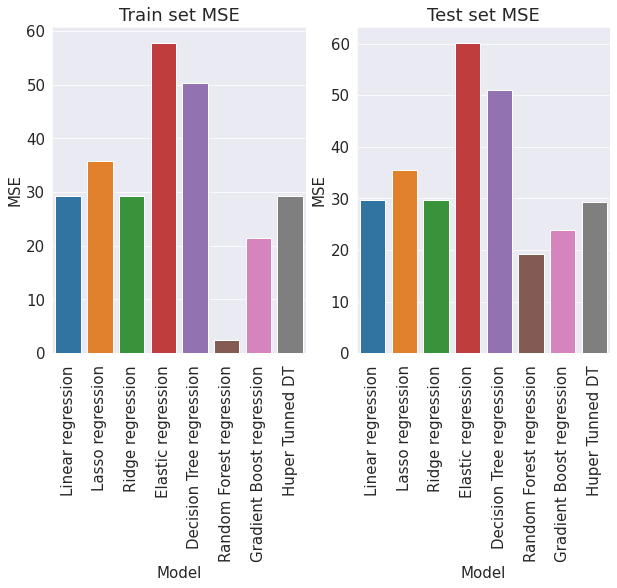

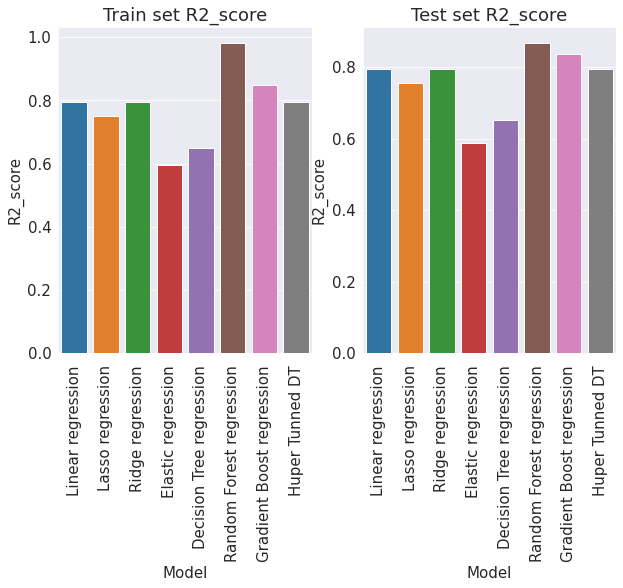

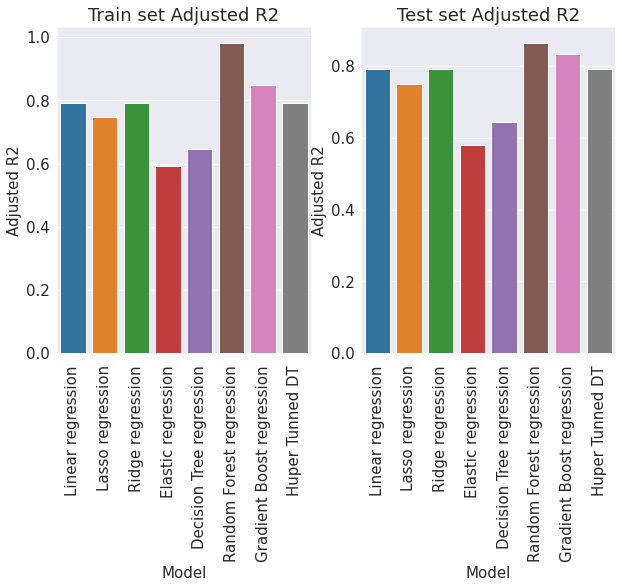

In [355]:
for i in metrics_list:
    bar_plot(train_df,test_df,i)

In [364]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,15))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

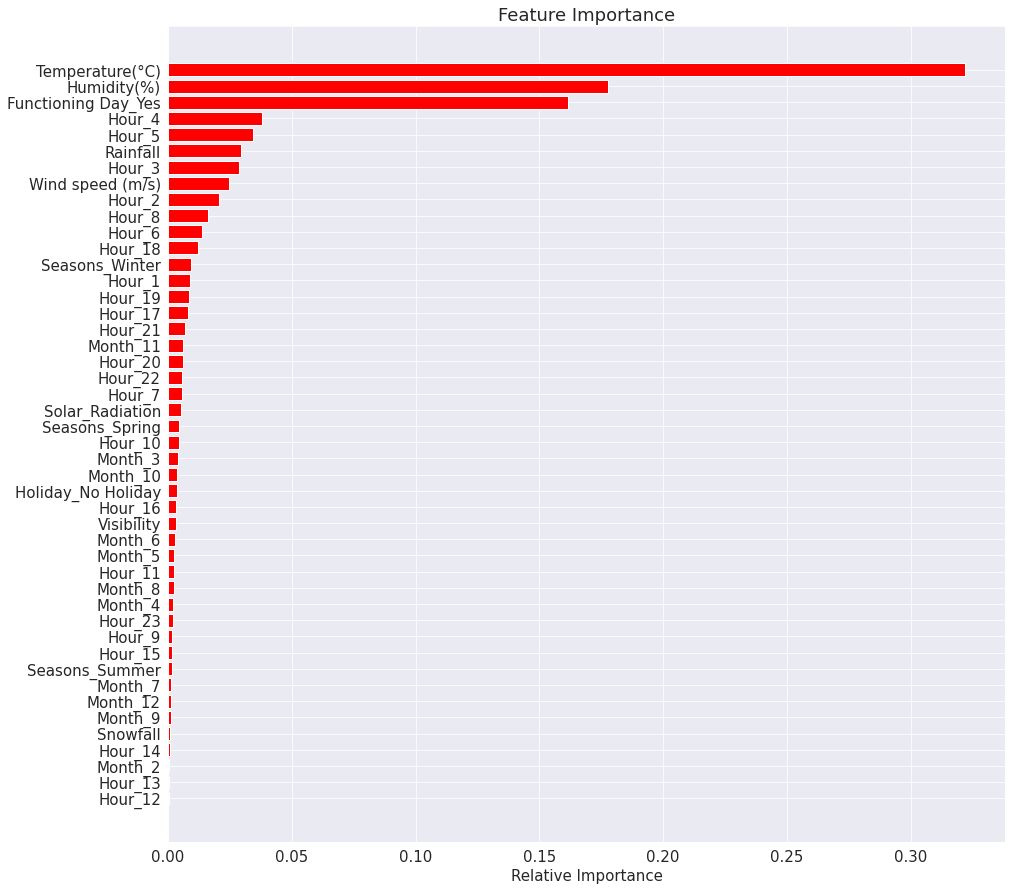

In [365]:
get_features_importance(RF_regressor,X)